In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt 
import os 
import json

# Import Dataset


In [29]:
init_path = "../../data/"
train_data = pd.read_csv(init_path + "train_data.csv")
test_data = pd.read_csv(init_path + "test_data.csv")
val_data = pd.read_csv(init_path + "val_data.csv")

In [43]:
def extract_data(data):
    X = data["Source"]
    y = data["Label"]
    return np.asarray(X), np.asarray(y)

X_train, y_train = extract_data(train_data)
y_train = y_train-1
X_test, y_test = extract_data(test_data)
y_test = y_test-1
X_val, y_val = extract_data(val_data)
y_val = y_val-1

In [44]:
from collections import Counter 

print("Train labels ratio: ")
print(Counter(y_train.tolist()))

print("Test labels ratio: ")
print(Counter(y_test.tolist()))

print("Val labels ratio: ")
print(Counter(y_val.tolist()))

Train labels ratio: 
Counter({2: 12586, 1: 3298, 0: 152})
Test labels ratio: 
Counter({2: 2700, 1: 727, 0: 33})
Val labels ratio: 
Counter({2: 2725, 1: 702, 0: 32})


# Training and Testing 

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() 
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

In [46]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

classifiers = {
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "XGBoost": xgboost
}

In [47]:
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

def get_metrics(ytrue, ypred, name, _type):
    print(classification_report(ytrue, ypred, zero_division=1))
    ret = classification_report(ytrue, ypred, output_dict=True, zero_division=1)
    ConfusionMatrixDisplay.from_predictions(ytrue, ypred)
    plt.savefig(os.path.join(results_dir, f"confusion_{_type}-{name}.png"), dpi=300)
    plt.show()
    print('\n\n')
    with open(os.path.join(results_dir, f"stats_{_type}-{name}.json"), "w") as f:
        json.dump(ret, f, indent=4)

Classifier: Decision Tree

On Train Set: 
              precision    recall  f1-score   support

           0       0.44      0.36      0.39       152
           1       0.61      0.53      0.57      3298
           2       0.88      0.91      0.89     12586

    accuracy                           0.83     16036
   macro avg       0.64      0.60      0.62     16036
weighted avg       0.82      0.83      0.82     16036



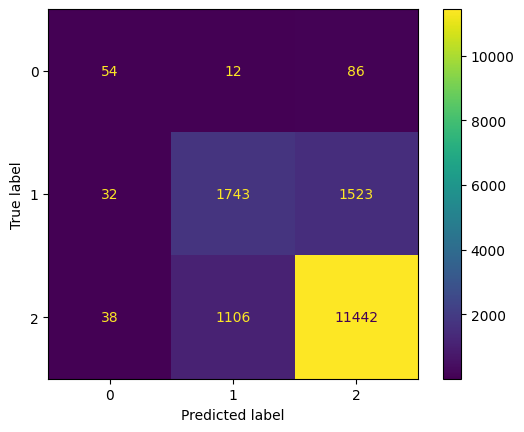




On Validation Set
              precision    recall  f1-score   support

           0       0.03      0.03      0.03        32
           1       0.23      0.26      0.25       702
           2       0.80      0.76      0.78      2725

    accuracy                           0.66      3459
   macro avg       0.35      0.35      0.35      3459
weighted avg       0.67      0.66      0.66      3459



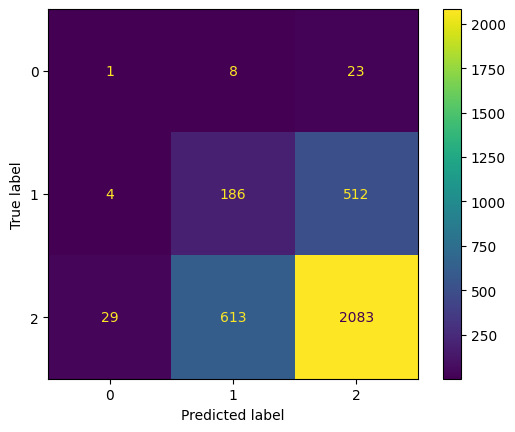




On Test Set
              precision    recall  f1-score   support

           0       0.06      0.06      0.06        33
           1       0.24      0.25      0.24       727
           2       0.79      0.78      0.78      2700

    accuracy                           0.66      3460
   macro avg       0.36      0.36      0.36      3460
weighted avg       0.67      0.66      0.66      3460



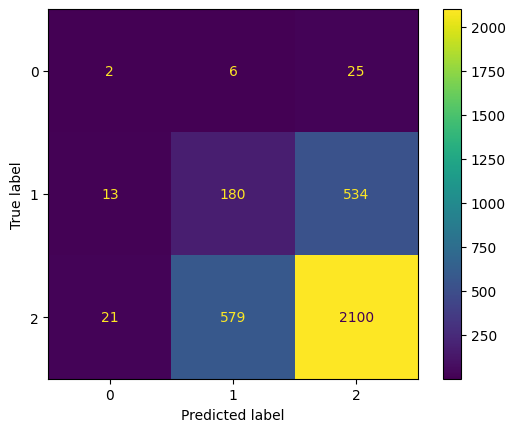




Classifier: Random Forest

On Train Set: 
              precision    recall  f1-score   support

           0       0.57      0.11      0.18       152
           1       0.69      0.35      0.46      3298
           2       0.84      0.96      0.90     12586

    accuracy                           0.83     16036
   macro avg       0.70      0.47      0.51     16036
weighted avg       0.81      0.83      0.80     16036



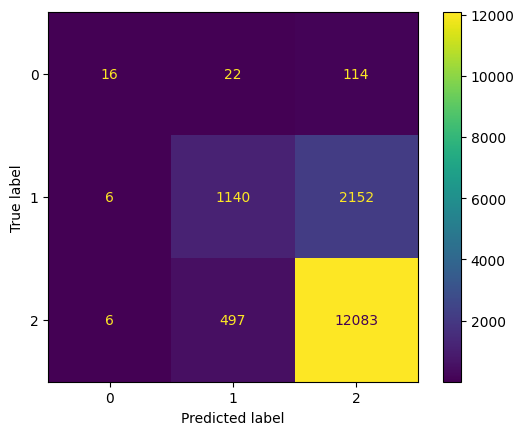




On Validation Set
              precision    recall  f1-score   support

           0       0.08      0.03      0.05        32
           1       0.26      0.16      0.20       702
           2       0.80      0.88      0.84      2725

    accuracy                           0.73      3459
   macro avg       0.38      0.36      0.36      3459
weighted avg       0.68      0.73      0.70      3459



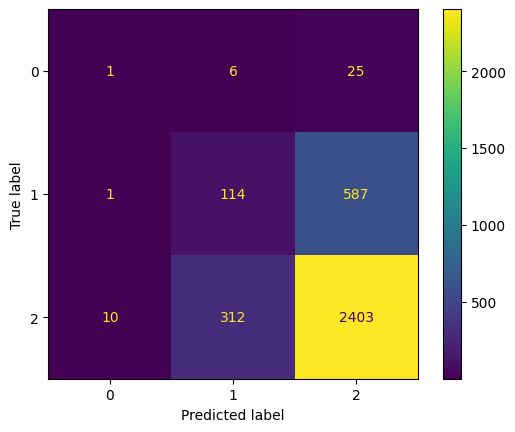




On Test Set
              precision    recall  f1-score   support

           0       0.20      0.06      0.09        33
           1       0.26      0.15      0.19       727
           2       0.79      0.89      0.84      2700

    accuracy                           0.72      3460
   macro avg       0.42      0.37      0.37      3460
weighted avg       0.67      0.72      0.69      3460



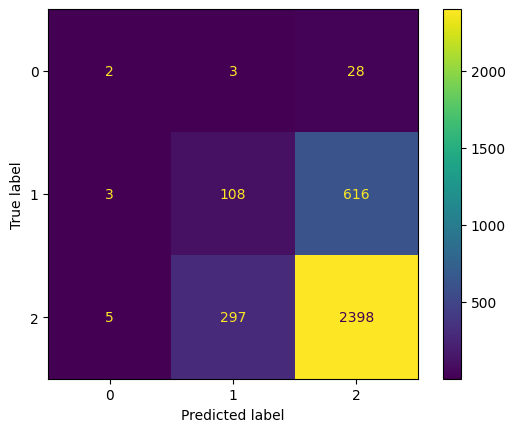




Classifier: XGBoost

On Train Set: 
              precision    recall  f1-score   support

           0       0.71      0.03      0.06       152
           1       0.86      0.07      0.13      3298
           2       0.80      1.00      0.89     12586

    accuracy                           0.80     16036
   macro avg       0.79      0.37      0.36     16036
weighted avg       0.81      0.80      0.72     16036



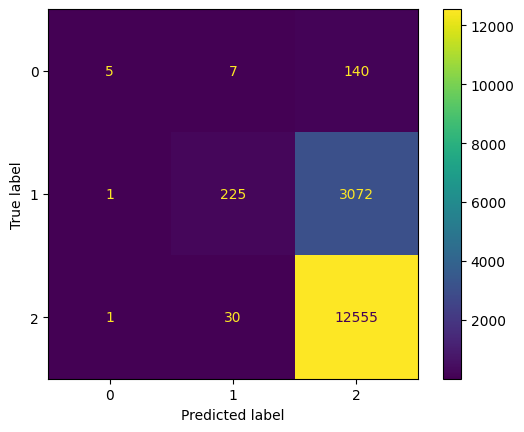




On Validation Set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.28      0.03      0.05       702
           2       0.79      0.98      0.88      2725

    accuracy                           0.78      3459
   macro avg       0.35      0.34      0.31      3459
weighted avg       0.68      0.78      0.70      3459



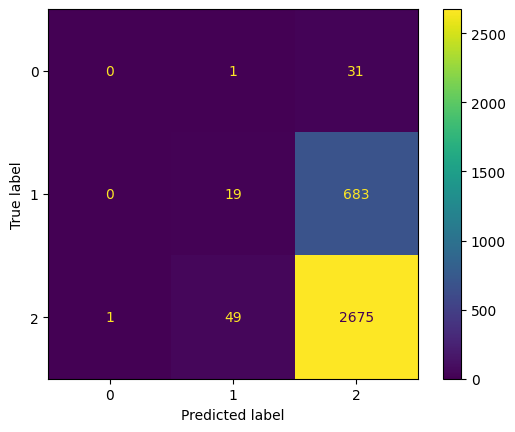




On Test Set
              precision    recall  f1-score   support

           0       0.25      0.03      0.05        33
           1       0.17      0.02      0.03       727
           2       0.78      0.98      0.87      2700

    accuracy                           0.77      3460
   macro avg       0.40      0.34      0.32      3460
weighted avg       0.65      0.77      0.68      3460



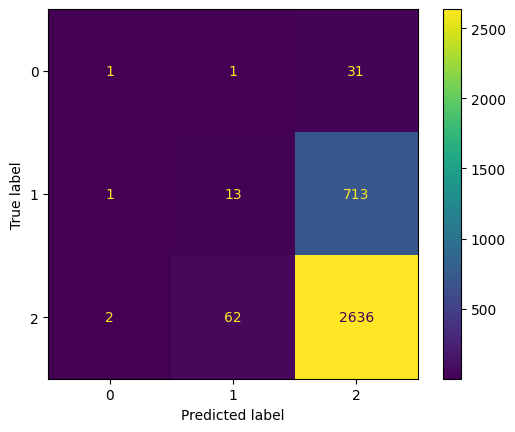

In [48]:
for name, clf in classifiers.items():
    
    clf.fit(X_train_vec, y_train)
    print(f"Classifier: {name}\n")
    
    print("On Train Set: ")
    y_pred = clf.predict(X_train_vec)
    get_metrics(y_train, y_pred, "train", name)
    
    print("On Validation Set")
    y_pred = clf.predict(X_val_vec)
    get_metrics(y_val, y_pred, "val", name)
    
    print("On Test Set")
    y_pred = clf.predict(X_test_vec)
    get_metrics(y_test, y_pred, "test", name)
    
    print("=" * 300)